Import the fastai library

In [ ]:
from fastai.vision import *
from google.colab import drive


Mount the Google Drive

In [ ]:
drive.mount('/content/gdrive')

Create a folder to store the banana pictures

In [ ]:
folder = 'banana'
file = 'banana.csv'

Create a folder to store the food pictures

In [ ]:
folder = 'food'
file = 'food.csv'

This gets the folders in the correct hierarchy

In [ ]:
path = Path('/content/gdrive/My Drive/foodIdentifier/')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

List all the files to make sure it worked

In [ ]:
path.ls()

Download all the food and banana images from Google search

In [ ]:
classes = ['food','banana']

download_images(path/file, dest, max_pics=200)

In [ ]:
download_images(path/file, dest, max_pics=200, max_workers=0)

Print the images

In [ ]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

Normalise all the images to the same size

In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

Show some random images to validate that everything has worked

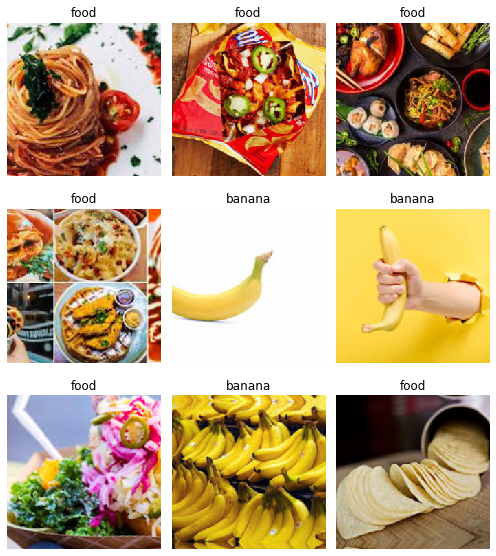

In [ ]:
data.show_batch(rows=3, figsize=(7,8))

Start training the nueral network

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.503713,0.656421,0.250000,00:51
1,0.876788,0.291928,0.093750,00:52
2,0.637837,0.099822,0.031250,00:49
3,0.481235,0.057518,0.031250,00:50


Save the current training session

In [ ]:
learn.save('stage-1')

Retrain with the correct epochs

In [ ]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.085269,0.042496,0.031250,00:50
1,0.091353,0.039541,0.031250,00:49


Save the second well trained neural network

In [ ]:
learn.save('stage-2')

In [ ]:
learn.export()

In [ ]:
defaults.device = torch.device('cpu')

Import an image from Google Drive and check if the image is a banana or not

In [ ]:
img = open_image(path/'ban.jpg')


In [ ]:
learn = load_learner(path)

Make the prediction and display it

In [ ]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class